#### 📌 Curse of Dimensionality

* As the **number of features (dimensions)** in data increases, two key problems arise:

  1. **Model overfitting:** The model starts learning even unimportant/noisy features, which confuses it.
  2. **Degrading performance:** Adding more features beyond a point leads to **lower accuracy and slower performance**, because the model struggles to generalize.

* You illustrated this using multiple models:

  * **M1:** Trained on 3 features → decent accuracy.
  * **M2:** 6 important features → higher accuracy.
  * **M3:** 15 features → highest accuracy.
  * **M4:** 50 features → accuracy starts to drop (some features not useful).
  * **M5:** 100 features → accuracy drops more.
  * **M6:** 500 features → even lower accuracy.

* Also gave a **human analogy**:

  * If you ask a domain expert too many conditions (location, bedrooms, near celebrity, many schools, shops etc.), they get confused, similarly the ML model gets confused.

---

### 🛠 How to prevent curse of dimensionality?

1️⃣ **Feature Selection:**

* Select only the most important features using statistical tests or feature importance from models.

2️⃣ **Feature Extraction / Dimensionality Reduction:**

* Create **new features** from existing features to capture most of the essential information in fewer dimensions.

---

### 🌟 PCA (Principal Component Analysis)

* PCA is a **dimensionality reduction technique** under feature extraction.
* It finds new **axes (principal components)** that capture the maximum variance in the data.
* Reduces features to fewer dimensions (while retaining most of the information).

> In next videos, you'll dive into PCA, geometric intuition, and see how it works to project data into lower-dimensional space.

---

## 📈 Optional illustrative plot

Here’s a **conceptual diagram** to show how PCA helps reduce dimensions:

```plaintext
Original Data (3D / high-dimensional)
+--------+
| F1     |
| F2     |   --->    PCA     --->   New Data (2D)
| F3     |                     +-------+
| ...    |                     | PC1   |
| Fn     |                     | PC2   |
+--------+                     +-------+
```

Or you can imagine a 2D scatter plot projected onto a line (first principal component):

```
Original data:
o o o     o
  o   o o
o   o o

Projected on PC1:
. . . . . . .
```

---

✅ **In short:**

* Curse of dimensionality: too many features confuse models, lower accuracy, slow computation.
* Fix via:

  * **Feature selection** (keep only important features).
  * **Dimensionality reduction / PCA** (create new features capturing most variance).



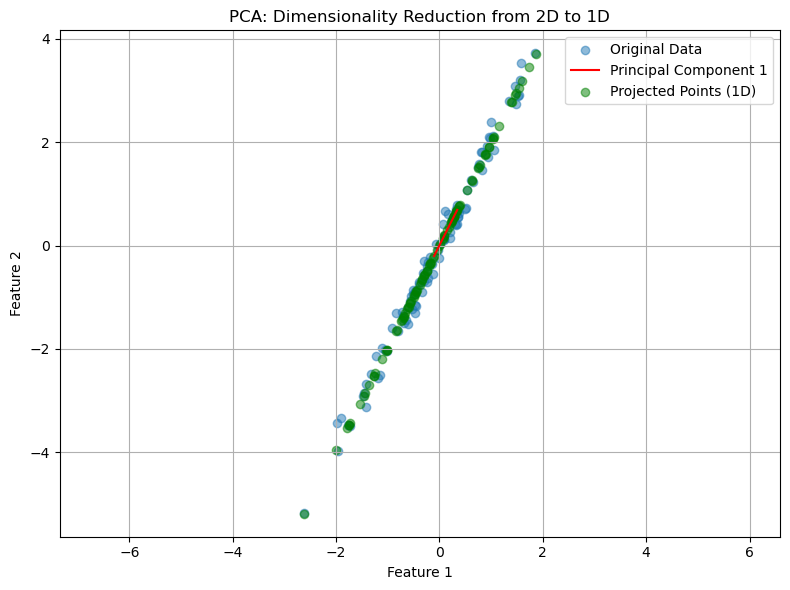

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate synthetic 2D data with correlation
np.random.seed(42)
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 0.2, 100)
data = np.vstack((x, y)).T

# Apply PCA to reduce 2D to 1D
pca = PCA(n_components=1)
pca.fit(data)
pc1 = pca.components_[0]
mean = pca.mean_

# Project data onto first principal component
data_pca = pca.transform(data)
projected = np.outer(data_pca, pc1) + mean

# Plot original data and projection line
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Original Data')
plt.plot([mean[0], mean[0] + pc1[0]], [mean[1], mean[1] + pc1[1]], color='red', label='Principal Component 1')
plt.scatter(projected[:, 0], projected[:, 1], color='green', alpha=0.5, label='Projected Points (1D)')
plt.title("PCA: Dimensionality Reduction from 2D to 1D")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

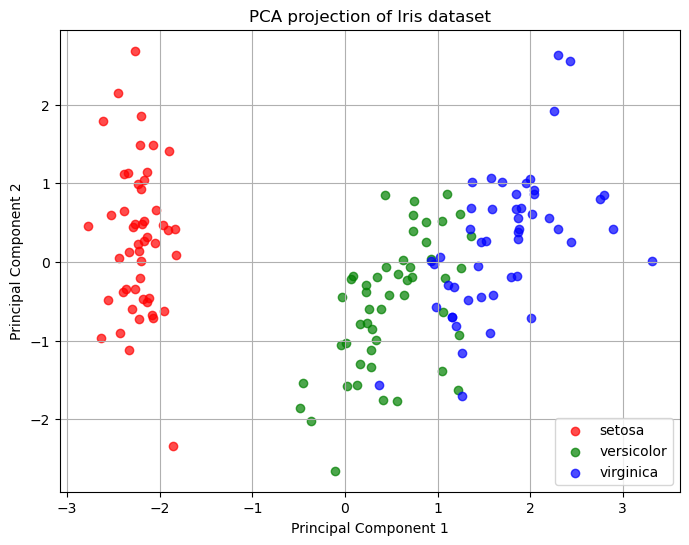

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load a sample dataset
data = load_iris()
X = data.data  # features
y = data.target  # labels

# Standardize the data (very important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check explained variance ratio
print("Explained variance by components:", pca.explained_variance_ratio_)
print("Total variance captured:", np.sum(pca.explained_variance_ratio_))

# Create a DataFrame for easier plotting
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y

# Plot the 2D PCA result
plt.figure(figsize=(8,6))
for target, color in zip(np.unique(y), ['r', 'g', 'b']):
    subset = df_pca[df_pca['Target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=data.target_names[target], color=color, alpha=0.7)

plt.title('PCA projection of Iris dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
